Objective :- To divide the sns dataset into clusters using unsupervise learning
sns :- dataset which consist of gender nad age with intrests in various sports

In [64]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')
pd.set_option("display.max_columns" , None)

In [65]:
sns = pd.read_csv(r"C:\Users\shan2\files\snsdata.csv")

In [66]:
sns.head()

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,tennis,sports,cute,sex,sexy,hot,kissed,dance,band,marching,music,rock,god,church,jesus,bible,hair,dress,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2006,M,18.982,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2006,F,18.801,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2,2,1,0,0,0,6,4,0,1,0,0,0,0,0,0,0,0
2,2006,M,18.335,69,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,2006,F,18.875,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2006,NaN,18.995,10,0,0,0,0,0,0,0,0,0,0,0,1,0,0,5,1,1,0,3,0,1,0,0,0,1,0,0,0,2,0,0,0,0,0,1,1


In [67]:
sns.isnull().sum()[sns.isnull().sum()>0]

gender    2724
age       5086
dtype: int64

In [68]:
sns.gender.fillna('F' , inplace=True)
sns.age.fillna(sns.age.mean() , inplace=True)

In [69]:
sns.columns[sns.dtypes == 'object']

Index(['gender'], dtype='object')

In [70]:
sns.gender.replace({'M':0 , 'F':1} , inplace=True)

In [71]:
print("The dataset has {} rows and {} columns".format(sns.shape[0] , sns.shape[1]))

The dataset has 30000 rows and 40 columns


In [72]:
print("Datatypes of each columns in the dataset \n")
sns.info()

Datatypes of each columns in the dataset 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 40 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   gradyear      30000 non-null  int64  
 1   gender        30000 non-null  int64  
 2   age           30000 non-null  float64
 3   friends       30000 non-null  int64  
 4   basketball    30000 non-null  int64  
 5   football      30000 non-null  int64  
 6   soccer        30000 non-null  int64  
 7   softball      30000 non-null  int64  
 8   volleyball    30000 non-null  int64  
 9   swimming      30000 non-null  int64  
 10  cheerleading  30000 non-null  int64  
 11  baseball      30000 non-null  int64  
 12  tennis        30000 non-null  int64  
 13  sports        30000 non-null  int64  
 14  cute          30000 non-null  int64  
 15  sex           30000 non-null  int64  
 16  sexy          30000 non-null  int64  
 17  hot           30000 non-nu

In [73]:
sns.head()

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,tennis,sports,cute,sex,sexy,hot,kissed,dance,band,marching,music,rock,god,church,jesus,bible,hair,dress,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2006,0,18.982,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2006,1,18.801,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2,2,1,0,0,0,6,4,0,1,0,0,0,0,0,0,0,0
2,2006,0,18.335,69,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,2006,1,18.875,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2006,1,18.995,10,0,0,0,0,0,0,0,0,0,0,0,1,0,0,5,1,1,0,3,0,1,0,0,0,1,0,0,0,2,0,0,0,0,0,1,1


In [74]:
from sklearn.cluster import KMeans
kmeans_sns = KMeans()

In [75]:
kmeans_sns.fit(sns)  # model is created

KMeans()

In [76]:
# how many clusters
# centriod of clusters
# SSD

In [77]:
number_of_clusters = len(kmeans_sns.cluster_centers_)

print("Numbers of clusters ------>" , number_of_clusters)

df_centriods = pd.DataFrame(kmeans_sns.cluster_centers_)
df_centriods.columns = sns.columns
df_centriods  

Numbers of clusters ------> 8


,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,tennis,sports,cute,sex,sexy,hot,kissed,dance,band,marching,music,rock,god,church,jesus,bible,hair,dress,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2007.630190,0.867699,17.287099,78.896904,0.324771,0.287825,0.292048,0.236805,0.177692,1.474314e-01,0.159395,0.135820,9.570725e-02,0.148487,0.396200,1.611541e-01,0.163617,0.155876,0.104504,0.524631,0.292752,0.040464,0.748768,0.258621,0.571780,0.334975,0.159747,0.029557,0.449331,0.123153,0.097818,0.327234,0.457072,1.674877e-01,0.095707,0.071077,0.170303,0.120690,0.092540,5.453906e-02
1,2007.436131,0.807569,17.493381,3.945121,0.220303,0.220460,0.187250,0.118552,0.104813,1.109366e-01,0.082987,0.090759,8.008165e-02,0.125854,0.261757,2.035016e-01,0.124441,0.104734,0.094920,0.357070,0.259088,0.034702,0.660438,0.215357,0.406140,0.195965,0.089032,0.018058,0.386119,0.090995,0.079140,0.213316,0.292141,1.337835e-01,0.052995,0.038078,0.174923,0.098218,0.081966,6.437937e-02
2,2007.710784,0.931373,17.617479,224.838235,0.303922,0.254902,0.274510,0.200980,0.186275,2.107843e-01,0.166667,0.117647,1.127451e-01,0.122549,0.455882,1.911765e-01,0.210784,0.156863,0.127451,0.446078,0.338235,0.058824,0.710784,0.210784,0.607843,0.279412,0.088235,0.004902,0.637255,0.166667,0.112745,0.318627,0.524510,1.813725e-01,0.137255,0.156863,0.186275,0.151961,0.107843,4.411765e-02
3,2007.486145,0.811774,17.392096,24.643213,0.277998,0.270591,0.240582,0.153493,0.158090,1.481292e-01,0.112119,0.108543,8.989912e-02,0.147108,0.336866,2.183629e-01,0.144043,0.132422,0.105095,0.437364,0.334312,0.040991,0.815477,0.256545,0.456519,0.251437,0.113012,0.023241,0.437875,0.115694,0.085813,0.257821,0.355510,1.540033e-01,0.065253,0.048908,0.187077,0.117482,0.090538,5.529307e-02
4,2008.000000,0.714286,17.013850,619.000000,0.285714,0.000000,0.000000,0.142857,0.857143,2.775558e-17,1.285714,0.285714,1.387779e-17,0.142857,0.428571,2.775558e-17,0.285714,0.142857,0.571429,1.285714,0.285714,0.000000,0.714286,0.000000,0.571429,0.000000,0.000000,0.142857,0.285714,0.142857,0.285714,0.000000,1.000000,2.775558e-17,0.142857,0.142857,0.285714,0.285714,0.142857,6.938894e-18
5,2007.792929,0.777778,101.880652,25.030303,0.181818,0.151515,0.212121,0.080808,0.106061,1.515152e-01,0.035354,0.060606,1.212121e-01,0.075758,0.267677,2.171717e-01,0.131313,0.075758,0.070707,0.333333,0.328283,0.040404,0.797980,0.303030,0.479798,0.398990,0.207071,0.020202,0.333333,0.055556,0.065657,0.202020,0.171717,7.070707e-02,0.055556,0.030303,0.242424,0.121212,0.080808,5.050505e-02
6,2007.551120,0.850633,17.391325,48.311392,0.311977,0.280428,0.240896,0.215969,0.180331,1.596884e-01,0.110419,0.113145,9.367089e-02,0.161441,0.376436,2.313535e-01,0.152678,0.141967,0.115871,0.490360,0.349562,0.053749,0.796105,0.279649,0.532035,0.289581,0.131451,0.021616,0.450243,0.135346,0.159494,0.289581,0.413827,1.626095e-01,0.087244,0.063875,0.202337,0.139435,0.089192,6.387537e-02
7,2007.676864,0.910134,17.674927,128.770554,0.393881,0.288719,0.238050,0.271511,0.215105,1.405354e-01,0.185468,0.130975,9.177820e-02,0.145315,0.483748,2.409178e-01,0.194073,0.197897,0.122371,0.580306,0.293499,0.042065,0.777247,0.261950,0.603250,0.387189,0.148184,0.025813,0.519120,0.165392,0.146272,0.442639,0.490440,1.749522e-01,0.143403,0.093690,0.209369,0.133843,0.120459,5.544933e-02


In [78]:
# draw elbow plot

In [79]:
SSD=[]
for k in range(1,11):
    kmeans_sns = KMeans(n_clusters=k)
    kmeans_sns.fit(sns)
    np.abs(kmeans_sns.score(sns))
    SSD.append(np.round(np.abs(kmeans_sns.score(sns))))
    print("value of k" , k )
    print("---------------")

value of k 1
---------------
value of k 2
---------------
value of k 3
---------------
value of k 4
---------------
value of k 5
---------------
value of k 6
---------------
value of k 7
---------------
value of k 8
---------------
value of k 9
---------------
value of k 10
---------------


Text(0.5, 1.0, 'Elbow Graph')

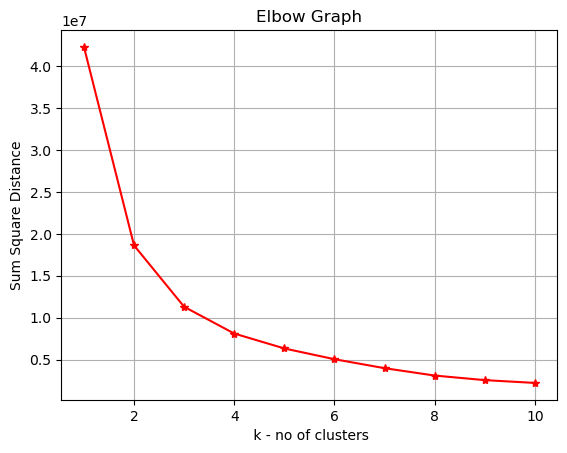

In [80]:
k_values = list(range(1,11))
plt.plot(k_values , SSD , marker ="*" , color ="red" )
plt.grid()
plt.xlabel(" k - no of clusters")
plt.ylabel("Sum Square Distance")
plt.title("Elbow Graph")

k = 5 after that SSD balances

In [81]:
kmeans_sns = KMeans(n_clusters=4)
kmeans_sns.fit(sns)

KMeans(n_clusters=4)

In [82]:
sns['k_means_cluster'] =   kmeans_sns.fit_predict(sns)

In [83]:
sns.sort_values('k_means_cluster')

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,tennis,sports,cute,sex,sexy,hot,kissed,dance,band,marching,music,rock,god,church,jesus,bible,hair,dress,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs,k_means_cluster
0,2006,0,18.982,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
16697,2008,1,16.745,11,1,0,2,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0
16695,2008,1,17.300,15,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
16692,2008,1,16.873,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
16689,2008,1,16.372,17,0,1,0,0,0,0,3,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22613,2009,1,15.636,45,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,3,0,0,1,0,0,0,0,3
7518,2007,0,18.185,35,0,1,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
3718,2006,1,19.874,60,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
22591,2009,1,16.293,23,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2,0,0,0,0,0,1,0,0,3


In [84]:
sns.k_means_cluster.value_counts()

k_means_cluster
0    16111
3     9482
1     3822
2      585
Name: count, dtype: int64

# Hierarical Clustering

In [85]:
from scipy.cluster.hierarchy import dendrogram , linkage

In [86]:
z = linkage( sns ,'ward' )

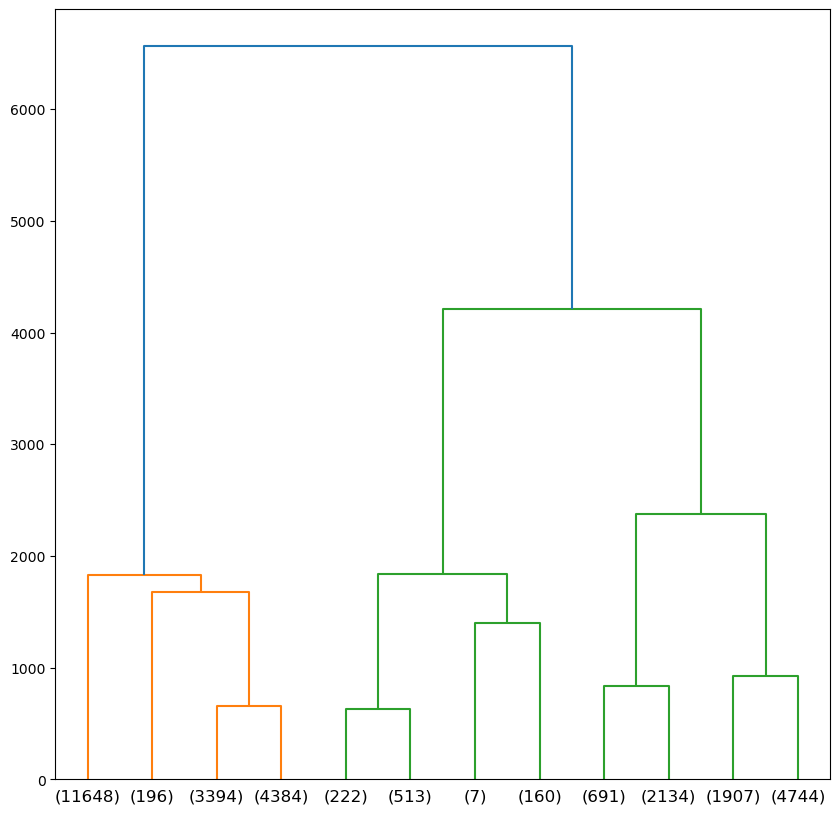

In [87]:
plt.figure(figsize=(10,10))
dendrogram(z ,p=12, truncate_mode= 'lastp');

In [88]:
from sklearn.cluster import AgglomerativeClustering

In [89]:
cluster = AgglomerativeClustering(n_clusters= 4)

In [90]:
cluster.fit_predict(sns)

array([1, 1, 3, ..., 1, 1, 1], dtype=int64)

In [91]:
sns['cluster_number'] = cluster.fit_predict(sns)

In [92]:
sns.sort_values('cluster_number')

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,tennis,sports,cute,sex,sexy,hot,kissed,dance,band,marching,music,rock,god,church,jesus,bible,hair,dress,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs,k_means_cluster,cluster_number
20967,2008,1,17.087,130,1,0,0,2,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0
26101,2009,1,16.047,221,0,0,0,0,1,1,0,2,0,0,0,1,0,0,0,0,0,0,1,0,1,1,1,0,5,3,1,1,3,2,0,0,0,0,0,2,2,0
23984,2009,1,15.713,237,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,4,0,0,0,3,1,0,0,3,0,0,3,0,0,0,0,2,2,0,0,2,0
21912,2008,1,16.747,135,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,2,0
13593,2007,1,17.506,140,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,3,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21228,2008,1,16.268,95,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3
16388,2008,1,16.378,76,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3
21225,2008,1,16.430,77,2,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,3,0,2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,5,0,0,1,3
21408,2008,1,17.153,67,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,3


# Outcome

1. Data is divided into 4 clusters.
2. Number of cluster is found using the elbow method.